# Electromagnetic Waves

This week, we will look at the prototype for time-dependent electromagnetic fields: the electromagnet plane wave.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Maxwell's Equations

In the absence of any sources — charges or currents — Maxwell's equations give ***wave equations*** for the electric and magnetic fields:

\begin{align*}
\nabla^2 \vec{E} - \dfrac{\epsilon\mu}{c^2} \dfrac{\partial^2 \vec{E}}{\partial t^2} &= 0 \\
\nabla^2 \vec{B} - \dfrac{\epsilon\mu}{c^2} \dfrac{\partial^2 \vec{B}}{\partial t^2} &= 0
\end{align*}

These descirbe waves that propagate with a speed of $v = c / \sqrt{\mu\epsilon}$.

Any function $f(\vec{r} \pm \vec{v} t)$ is a solution of the wave equation.

Maxwell's equation impose additional constraints.  In particular,

\begin{align*}
\nabla \times \vec{E} &= \dfrac{1}{c} \dfrac{\partial \vec{B}}{\partial t} \\
\nabla \times \vec{B} &= -\dfrac{\mu\epsilon}{c} \dfrac{\partial \vec{E}}{\partial t}
\end{align*}

## Plane Waves

One solution to the wave equation is a ***plane wave***:

$$
f(\vec{r},t) = A \, e^{i(\vec{k} \cdot \vec{r} - \omega t)}
$$

The wave equation requires that $\omega = vk$.  If each component of $\vec{E}$ and $\vec{B}$ has this form, we call it an electromagnetic plane wave.  Maxwell's equations give the following relations:

\begin{align*}
\vec{k} \cdot \vec{E} &= 0 \\
\vec{k} \times \vec{E} &= \dfrac{\omega}{c} \vec{B} \\
\vec{k} \cdot \vec{B} &=0 \\
\vec{k} \times \vec{B} &= - \dfrac{\mu \epsilon \omega}{c} \vec{E}
\end{align*}

Let's look at this class of solution.

In [2]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 1*np.pi
theta = 0.00 * np.pi
phi = 0.00 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set time.
t0 = 0

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 1.00 * np.pi
phiE = 0.00 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 0.0 * np.pi

# Create a grid.
box_size = 2
num_points = 11

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Compute the fields on a grid.
Ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
Ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
Ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

Bx = (ky*Ez - kz*Ey)/omega
By = (kz*Ex - kx*Ez)/omega
Bz = (kx*Ey - ky*Ex)/omega

Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

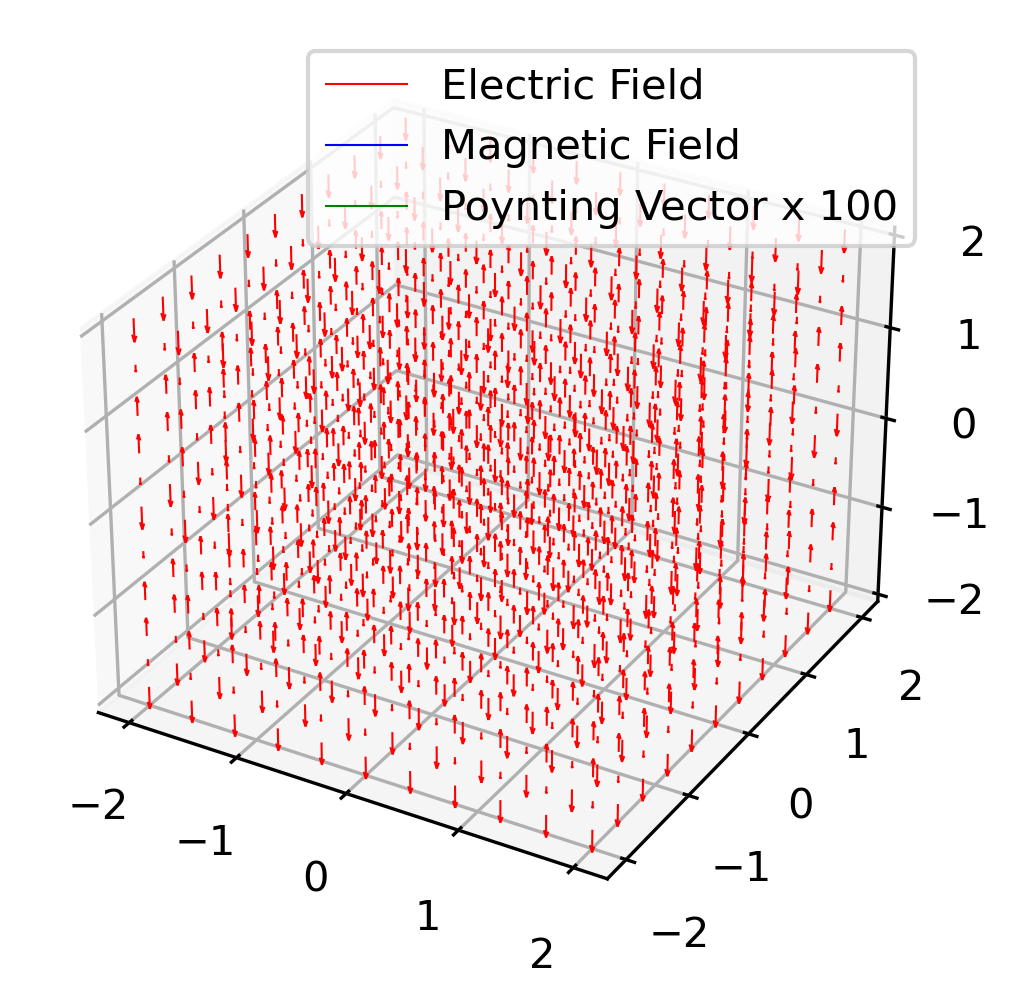

In [3]:
# Plot the field.
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color='red', label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color='blue', label='Magnetic Field')
ax.quiver3D(X,Y,Z, 100*Sx.real, 100*Sy.real, 100*Sz.real, pivot='middle',
            linewidth=0.5, color='green', label='Poynting Vector x 100')
ax.legend()

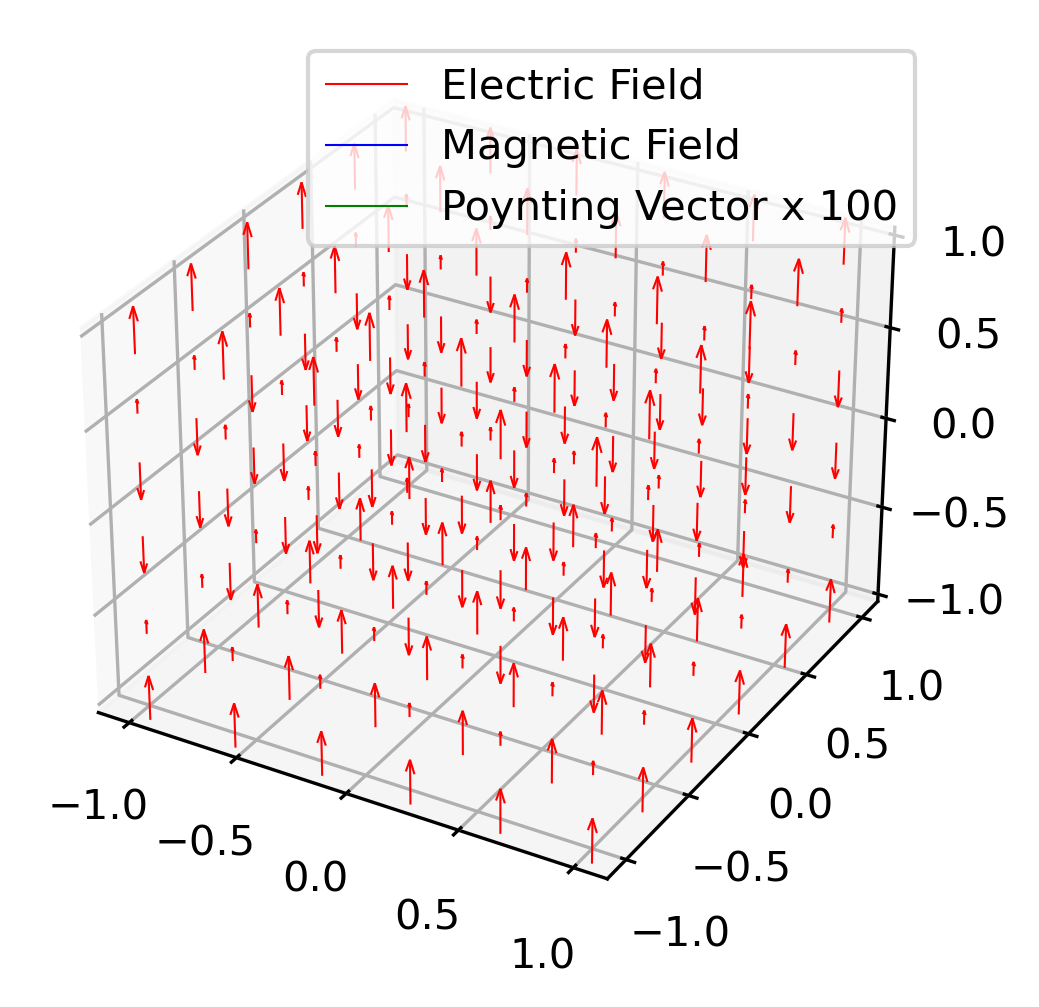

In [4]:
# Plot the field.
# Crop to see more detail.

# Create a grid.
box_size = 1
num_points = 6

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Compute the fields on a grid.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())

# Make the plot.
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
            linewidth=0.5, color='red', label='Electric Field')
ax.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
            linewidth=0.5, color='blue', label='Magnetic Field')
ax.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
            linewidth=0.5, color='green', label='Poynting Vector x 100')
ax.legend()

## Spatial Structure

Do your best to describe the spatial structure of the fields.

- In what direction does the electric field point?
- In what direction does the magnetic field point?
- In what direction does the Poynting vector point?
- How does this change as you move along the x, y, and z axes?

It appears that the electric field always points in the positive or negative x direction. The magnetic field always points in the positive or negative y direction. Regardless of which way the magnetic or electric fields point, the Poynting vector always points in the positive z direction. 

The magnitude of the wave vector in the last plot was $k = \pi$.  Change this value to $k = 2\pi$.  Describe how the spatial structure of the fields changes.

It seems that as the k vector increases, the density of the field gets smaller. It's not super noticeable on the first plot, but on the second there is a measureable increase. It also appears that the arrows in the center of the plot get smaller.

Change this value to $k = \pi/2$.  Describe how the spatial structure of the fields changes.

In this plot, the arrows in the center of the plot get larger as k decreases. I decreased the k value to 0.0001 pi and that seemed to have some effect in increasing the density and magnitude of the plot. Once again, it is somewhat difficult to tell since the plot is so large.

The direction of $\vec{k}$ is defined by the polar angle $\theta$ and the azimuthal angle $\phi$.  Set $k = \pi$.  Change the ***direction*** of $\vec{k}$ — but not the magnitude — and describe your observations of the spatial structure of the fields.

- How does the direction of $\vec{k}$ affect the direction of $\vec{E}$?
- How does the direction of $\vec{k}$ affect the direction of $\vec{B}$?
- How does the direction of $\vec{k}$ affect the direction of $\vec{S}$?

When viewing the plot, there are certain angles of k where the wave is going in a certain direction. You can see each plane of the wave in the graph because there are areas of minima and maxima in the field strength. The E field is not changed when theta is incresed to pi/2, but the B and Poynting vectors disappear. Theta seems to change the magnitude of the B field but not the direction.

The direction of the electric field and the relative phase of its components defines the ***polarization*** of the wave.

Set $\vec{k}$ to point along the $z$-axis: $\theta = 0$ and $\phi=0$.

Vary the direction of the electric field by adjusting `thetaE` and `phiE` above.

- What happens to $\vec{E}$, $\vec{B}$, and $\vec{S}$ as you change `phiE` while holding `thetaE = 0.5 * np.pi`?
- What happens to $\vec{E}$, $\vec{B}$, and $\vec{S}$ as you change `thetaE` while holding `phiE = 0.0`?
- What directions of the electric field give the smallest Poynting vectors?

The phiE angle seems to change the rotation of the E vector in the X plane. What is interesting is that the Poynting vector stays the same regardless of the phiE angle. The thetaE angle changes the direction that the E vector points in the z plane. changing the angle to 1 makes the Poynting vector decrease to nothing. B shrinks when the angle gets close to 0. The direction in the phi = 0 or pi makes the Poynting vector disappear. 

## Temporal Structure

Electromagnetic waves oscillate in space and time.

The code below will create two plots of the same electromagnetic plane wave at different times.

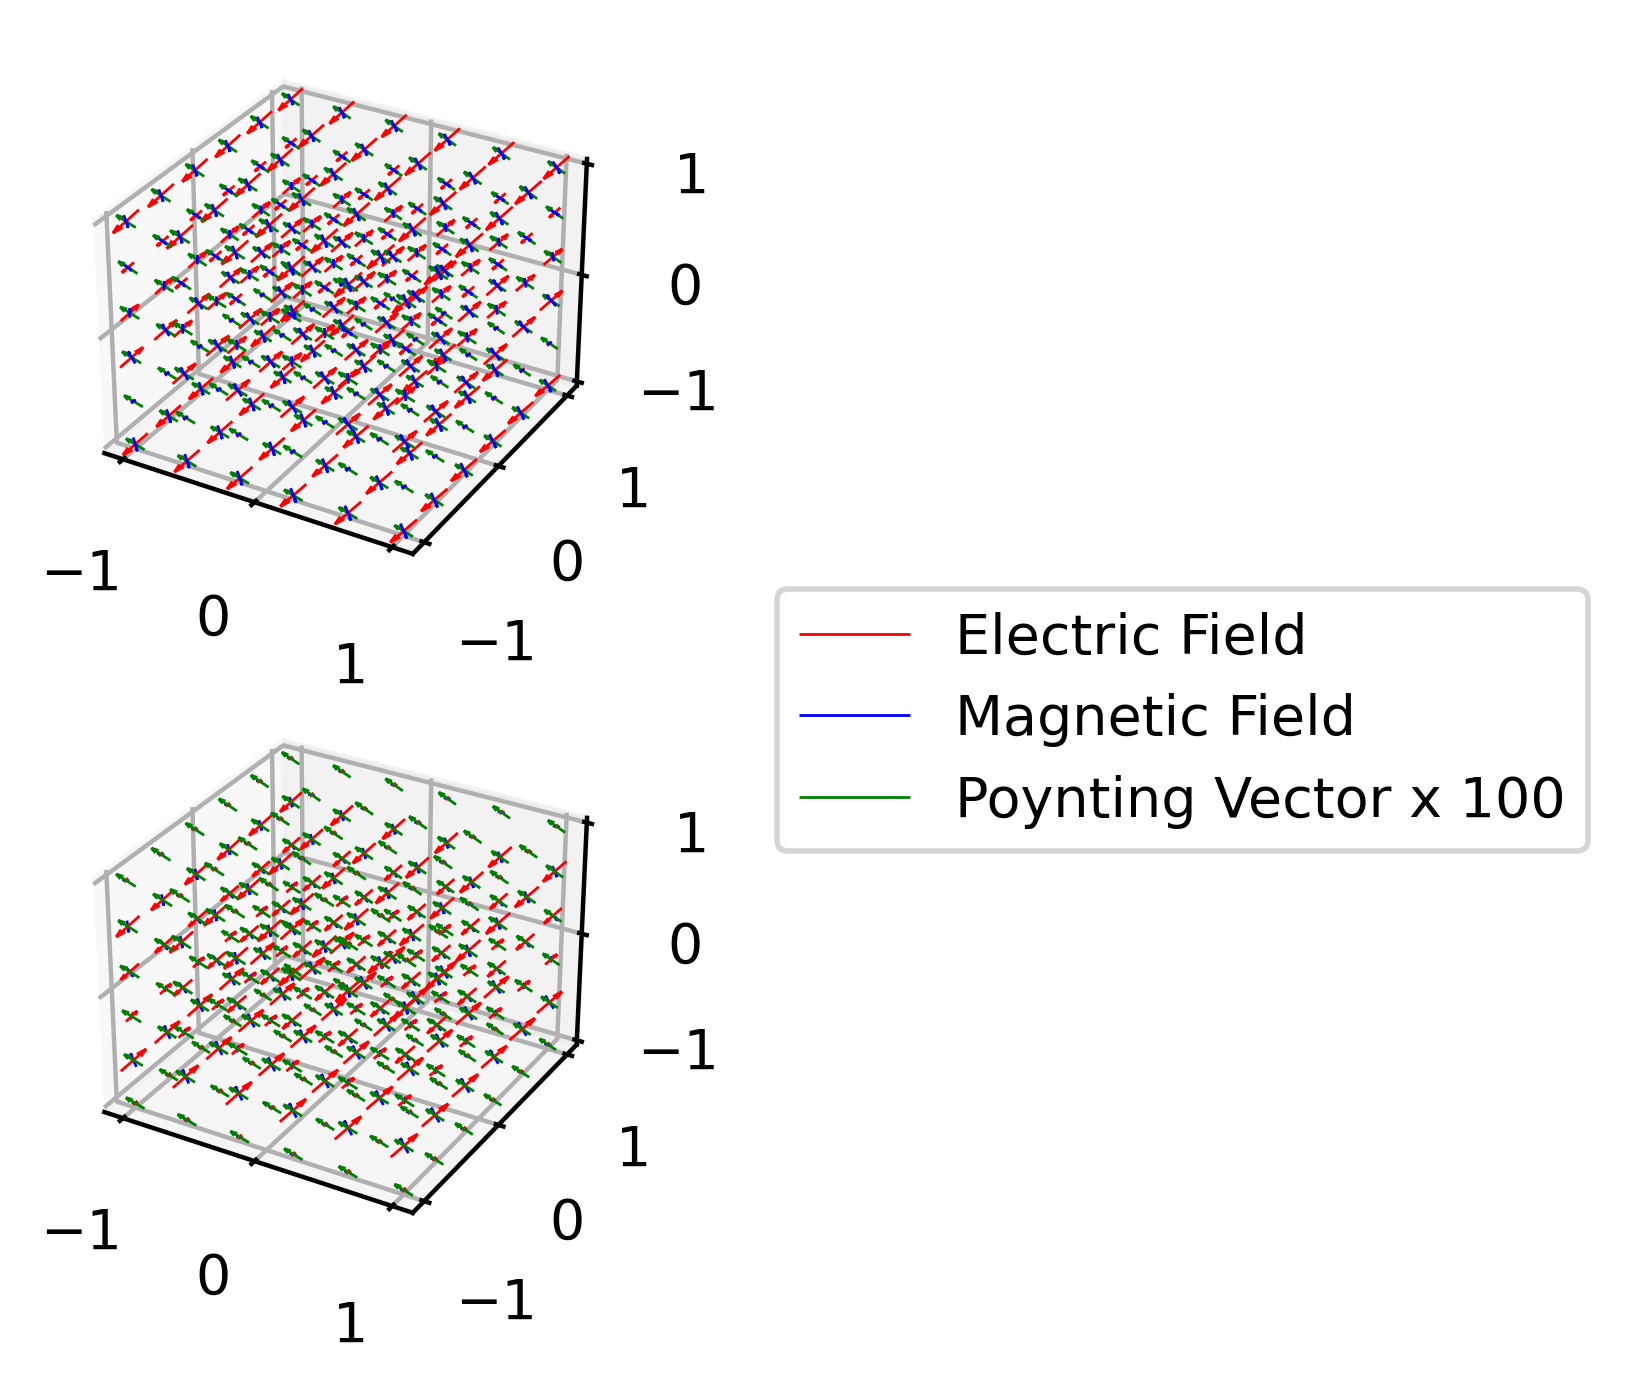

In [5]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 1.00 * np.pi
theta = 0.00 * np.pi
phi = 0.00 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set times for snapshots.
T = (2*np.pi) / omega
t0 = 0.00
t1 = t0 + 0.75*T

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.25 * np.pi
phiE = 0.25 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 0.13 * np.pi

# Plot the results.
# Create a grid.
box_size = 1
num_points = 6

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Create the figure.
fig = plt.figure(dpi=400)
ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212, projection='3d')

# Compute the fields on a grid at the first time.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())

ax1.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
             linewidth=0.5, color='red', label='Electric Field')
ax1.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
             linewidth=0.5, color='blue', label='Magnetic Field')
ax1.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
             linewidth=0.5, color='green', label='Poynting Vector x 100')

# Compute the fields on a grid at the second time.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi) * (ex * by.conj() - ey * bx.conj())

ax2.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
             linewidth=0.5, color='red', label='Electric Field')
ax2.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
             linewidth=0.5, color='blue', label='Magnetic Field')
ax2.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
             linewidth=0.5, color='green', label='Poynting Vector x 100')
ax2.legend(bbox_to_anchor=(1.25, 1.25), loc='upper left')

Adjust the value of `t1` while keeping `t0` and the other parameters constant.

- What differences do you notice between the two plots as you adjust `t1`?

Although the magnitude of the fields in the plot may change at different points, the Poynting vector stays almost constant in the positive z direction. The field seems to point in different directions and have different magnitudes based on the time.

Adjust the direction of $\vec{k}$, as in the exercises above.  Observe the wave at different times.

- What differences do you notice between the two plots as you adjust `t1` and $\vec{k}$?

Changing k's theta value changed the magnitude of the field at different points overall. The same effects occur as in the part before, but now the magnitude of the field can vary at different points depending on the time at which the field is measured. The k value effects where the Poynting vector points, but still regardless of time it always points in the same direction (but perhaps with smaller magnitude).

In addition to changing the ***direction*** of $\vec{E}$, we can also change the ***relative phase*** of its components.  The code above allows us to describe waves of the form

\begin{align*}
Ex &= E_{x0} \, \cos \omega t \\
Ey &= E_{y0} \, \cos (\omega t + \alpha) \\
Ez &= E_{z0} \, \cos \omega t
\end{align*}

Reset $\vec{k}$ to point along the $z$-axis: $\theta = 0$ and $\phi = 0$.  Set $\alpha = \pi/2$.  Then, adjust the value of `t1` while keeping `t0` and the other parameters constant.

- What differences do you notice between the two plots as you adjust `t1`?
- How does $\alpha = \pi/2$ compare with $\alpha = 0$?

Although it's fairly difficult to tell what is happening due to the field being so dense, it seems that the magnitude of B gets larger at different points compared with before. For example, in the center of the graph the E field is at a minimum when the B field is at a maximum. This just changes the way the fields are either in or out of phase. 

Explore other values of $\alpha$ and `t1`.

- How does $\alpha$ affect the patterns you observe?

When alpha is increased to pi, the E field flips direction with respect to the B field and the Poynting vector goes the opposite way. Decreasing the alpha value to pi/8 made the fields increase almost proportionally with each other, but the maximums were not off like the pi/2 example.

# Electromagnetic Movies

Observing plane waves is instructive, but a movie can illustrate the behavior even better.

The following code will create a movie of a plane wave and display it in this notebook.  It may take a little while to run.

If you get an error regarding `ffmpeg` use `conda` to install it.  Open a terminal or the "Anaconda Prompt" and type
```
conda install --channel conda-forge ffmpeg
```

In [6]:
# Name of file to store movie.
num_frames = 500

## Define the electromagnetic wave and plot its initial configuration.
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 1.00 * np.pi
theta = 0.00 * np.pi
phi = 0.25 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta) 

omega = k/n

# Set times for snapshots.
T = (2*np.pi) / omega
dt = T / 50
t0 = 0.00

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.50 * np.pi
phiE = 0.33 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 0.50 * np.pi

In [7]:
# Create a grid.
L = 1
N = 5

# Define function to compute fields on a grid.
def compute_fields(n, box_size=L, num_points=N):
    t = t0 + n * dt
    
    s = np.linspace(-box_size, box_size, num_points)
    X, Y, Z = np.meshgrid(s,s,s)

    
    # Compute the fields on a grid at the initial time.
    ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t))
    ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t)) * np.exp(1j*alpha)
    ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t))
    
    bx = (ky*ez - kz*ey)/omega
    by = (kz*ex - kx*ez)/omega
    bz = 0.00*(kx*ey - ky*ex)/omega
    
    sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
    sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
    sz = 0.00*1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())
        
    return X, Y, Z, ex.real, ey.real, ez.real, bx.real, by.real, bz.real, sx.real, sy.real, sz.real


# Create a figure for each time step.
# It is essential that the frames be named in alphabetical order.
# {:03d} will display integers with three digits and insert zeros if needed:
# '000_movie.jpg', '001_movie.jpg', etc.
file_name = "{:03d}_movie.jpg"

# Generate frames and save each figure as a separate .jpg file.
for i in range(num_frames):
    # Update fields.
    X,Y,Z,ex,ey,ez,bx,by,bz,sx,sy,sz = compute_fields(i)

    ## Set up the plot.
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(projection='3d')
    ax.set(xlim3d=(-1.1, 1.1), xlabel='X')
    ax.set(ylim3d=(-1.1, 1.1), ylabel='Y')
    ax.set(zlim3d=(-1.1, 1.1), zlabel='Z')
    ax.view_init(40,25)

    e_quivers = ax.quiver(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
                          linewidth=0.5, color='red', label='Electric Field')
    b_quivers = ax.quiver(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
                          linewidth=0.5, color='blue', label='Magnetic Field')
    s_quivers = ax.quiver(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
                          linewidth=0.5, color='green', label='Poynting Vector x 100')

    ax.legend(bbox_to_anchor=(0.7, 1.1), loc='upper left')
    
    plt.savefig(file_name.format(i))
    print("%s saved ..." % file_name.format(i))
    plt.close(fig)

000_movie.jpg saved ...
001_movie.jpg saved ...
002_movie.jpg saved ...
003_movie.jpg saved ...
004_movie.jpg saved ...
005_movie.jpg saved ...
006_movie.jpg saved ...
007_movie.jpg saved ...
008_movie.jpg saved ...
009_movie.jpg saved ...
010_movie.jpg saved ...
011_movie.jpg saved ...
012_movie.jpg saved ...
013_movie.jpg saved ...
014_movie.jpg saved ...
015_movie.jpg saved ...
016_movie.jpg saved ...
017_movie.jpg saved ...
018_movie.jpg saved ...
019_movie.jpg saved ...
020_movie.jpg saved ...
021_movie.jpg saved ...
022_movie.jpg saved ...
023_movie.jpg saved ...
024_movie.jpg saved ...
025_movie.jpg saved ...
026_movie.jpg saved ...
027_movie.jpg saved ...
028_movie.jpg saved ...
029_movie.jpg saved ...
030_movie.jpg saved ...
031_movie.jpg saved ...
032_movie.jpg saved ...
033_movie.jpg saved ...
034_movie.jpg saved ...
035_movie.jpg saved ...
036_movie.jpg saved ...
037_movie.jpg saved ...
038_movie.jpg saved ...
039_movie.jpg saved ...
040_movie.jpg saved ...
041_movie.jpg sa

342_movie.jpg saved ...
343_movie.jpg saved ...
344_movie.jpg saved ...
345_movie.jpg saved ...
346_movie.jpg saved ...
347_movie.jpg saved ...
348_movie.jpg saved ...
349_movie.jpg saved ...
350_movie.jpg saved ...
351_movie.jpg saved ...
352_movie.jpg saved ...
353_movie.jpg saved ...
354_movie.jpg saved ...
355_movie.jpg saved ...
356_movie.jpg saved ...
357_movie.jpg saved ...
358_movie.jpg saved ...
359_movie.jpg saved ...
360_movie.jpg saved ...
361_movie.jpg saved ...
362_movie.jpg saved ...
363_movie.jpg saved ...
364_movie.jpg saved ...
365_movie.jpg saved ...
366_movie.jpg saved ...
367_movie.jpg saved ...
368_movie.jpg saved ...
369_movie.jpg saved ...
370_movie.jpg saved ...
371_movie.jpg saved ...
372_movie.jpg saved ...
373_movie.jpg saved ...
374_movie.jpg saved ...
375_movie.jpg saved ...
376_movie.jpg saved ...
377_movie.jpg saved ...
378_movie.jpg saved ...
379_movie.jpg saved ...
380_movie.jpg saved ...
381_movie.jpg saved ...
382_movie.jpg saved ...
383_movie.jpg sa

In [8]:
!ffmpeg -y -i %03d_movie.jpg -pix_fmt yuv420p movie.mp4

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

In [9]:
# Play the movie within the notebook.
from IPython.display import HTML

HTML("""
    <video width="800" height="800" alt="test" controls>
        <source src=%s type="video/mp4">
    </video>
""" % "movie.mp4")


Even though it takes a while to create a video, play around with the field parameters and try to get an intuition for the kinds of electromagnetic fields associated with different polarizations ($\vec{E}_0$ and $\alpha$) and wave vectors ($\vec{k}$).

***Describe your experiments and observations.***

- Give a set of parameters for an electromagnetic wave with **linear polarization**.
- Give a set of parameters for an electromagnetic wave with **circular polarization**.
- Give a set of parameters for an electromagnetic wave with **elliptical polarization**.

With linear polarization, the electric field spins to clockwise in planes which vary with time and amplitude. The poynting vector increases and decreases based on the magnitude of the E and B fields, which change together. I couldn't figure out how to get a circularly polarized wave. I tried setting the E fields to 0 in the z direction, but I always just got a field with only a b field. Similarly with an elliptical wave, I didn't know how to make that happen. What I think was interesting is that the E and B vectors would spin, but in a single wave the magnitude has peaks which move along the surface.

Why is it called an "electromagnetic plane wave"?

I noticed that the magnitude of the fields would have peaks which travelled across the space to the other side. This would happen in all space, where the peaks would move in as a single mass of uniform amplitude. These waves continue forever. These can be in different shapes, I imagine the amplitude of a circularly polarized wave would have a wave of uniform amplitude which moves in a circle.

# Reflection and Summary

- What are the major takeaways of this assignment for you?
- What was the most difficult part of this assignment?
- What was the most interesting part of this assignment?
- What questions do you have?

This lab illustrated how different components of wave equations actually effect the shape, direction, and amplitude of an electormagnetic wave. The k values seems to effect the direction of the poynting vector and the strengths of each field component. The starting angle would determine how the magnitude of each field would change with each other. I thought it was interesting that the wave would result in spinning electric and magnetic fields, but the amplitude moved in a wave. I don't really know what caused this, will definitely ask in class! The most difficult part of this assignment was making the movie part be either circularly polarized or eliptically polarized.

Sorry this isn't my best work, I had to really run through this one because of other comittments (i.e. several tests and a mountain of homeowork). If I get time I will certainly come back because I thought this was a really cool notebook!